In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import json

In [2]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
RGB_IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

TRAIN_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_train_split/whole_resize'
TEST_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_eval_img_resize/'

BASE_MODEL_NAME = 'ecom-image-model_basemodel_2020_02_20_20_25_21.h5'

In [3]:
import tensorflow as tf
keras = tf.keras

In [4]:
def read_list_from_disk(filename, directory="."):
    """
    Reads a list stored as a file from the disk and returns it as a python list
    """
    plist = []
    if not os.path.exists(filename):
        print(f"File path not found: {filename}\n List could not be retrieved")
    with open(filename, 'r') as filehandle:
        for line in filehandle:
            # remove linebreak which is the last character of the string
            l = line[:-1]
            plist.append(l)

    return plist

def read_history(filename):
    history = {}
    """
    Reads the history object from the disk and returns it as a python dictionary
    :param: filename - full path of the history object or only the filename if in the current directory
    """
    try:
        history = open(filename).read()
        history = dict(eval(json.loads(history), {"array": np.array, "float32": float}))
    except FileNotFoundError:
        print(f"No file found at the path specified: {filename}")
        
    return history

In [5]:
training_df = pd.read_csv('attributes_training_df.csv', index_col='index')
testing_df = pd.read_csv('attributes_testing_df.csv', index_col='index')

features = read_list_from_disk('filtered_features.txt')

print(f"Training shape: {training_df.shape}")
print(f"Testing shape: {testing_df.shape}")
print(f"Features length: {len(features)}")

Training shape: (96197, 232)
Testing shape: (11453, 232)
Features length: 112


In [7]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                        preprocessing_function=keras.applications.resnet50.preprocess_input)

test_gen = data_gen.flow_from_dataframe(testing_df,directory=TEST_IMAGE_PATH, 
                                        batch_size=32, shuffle=False,
                                        x_col='filename', y_col=features, 
                                        class_mode='other', target_size=IMAGE_SIZE)

Found 11453 validated image filenames.


In [197]:
import importlib
import class_weights_utils as cwutils
importlib.reload(cwutils)
import classification_utils as classiutils
importlib.reload(classiutils)

<module 'classification_utils' from '/home/ilambda/goods_viewer/Debasish/classification_utils.py'>

### Read the history dicts of the models
- alllayers is the baseline

In [11]:
history_alllayers_1 =  read_history('new_filt_attribs_base_train_history_2020_03_03_02_37_33.json')
history_alllayers_2 = read_history('new_filt_attribs_all_layers_e_20_history_2020_03_03_20_03_57.json')
history_alllayers_cw_1 = read_history('new_filt_attribs_all_layers_cw_e_20_history_2020_03_04_04_56_34.json')
history_alllayers_cw_2 = read_history('new_filt_attribs_all_layers_cw_2_e_20_history_2020_03_04_19_34_59.json')
history_alllayers_cw_imnet = read_history('new_filt_attribs_all_layers_cw_imnet_3_e_20_history_2020_03_05_03_10_54.json')

In [46]:
history_alllayers_imnet = read_history('new_filt_attribs_all_layers_imnet_4_e_20_history_2020_03_05_14_58_51.json')
history_alllayers_imnet_d2 = read_history('new_filt_attribs_all_layers_imnet_5_e_20_history_2020_03_05_19_42_46.json')

### Best Model

In [71]:
history_alllayers_imnet_d3 = read_history('new_filt_attribs_all_layers_imnet_d6_e_20_history_2020_03_06_14_35_22.json')

In [164]:
history_alllayers_imnet_d3_1 = read_history('new_filt_attribs_all_layers_imnet_d6.1_e_20_history_2020_03_06_19_10_47.json')
history_alllayers_imnet_d3_bn = read_history('all_layers_bn_imnet_d3_adam_history_2020_03_10_03_33_18.json')

In [135]:
def mean_precision_recall(history):
    mean_precision = np.mean(history['val_precision'], axis=1)
    mean_recall = np.mean(history['val_recall'], axis=1)
    
    return mean_precision, mean_recall
    

In [163]:
history_alllayers_imnet_d3['val_auc']

[0.9031153,
 0.9258266,
 0.93131846,
 0.9352554,
 0.9346403,
 0.93248767,
 0.93373924,
 0.93111885,
 0.9295012,
 0.9301017,
 0.9279816,
 0.9261931,
 0.9240281,
 0.9240129,
 0.92258435,
 0.9217312,
 0.9205169,
 0.9137507,
 0.9168213,
 0.9161503]

In [180]:
color_list = ['red','blue','yellow','black','pink']

In [184]:
history_alllayers_imnet_d3['val_loss']

[0.1937058220251965,
 0.1731991337203398,
 0.16762404318923696,
 0.16355935821181655,
 0.1637765261986832,
 0.16598574813876607,
 0.16498109600826802,
 0.16769005525072503,
 0.1706322206064497,
 0.17059547326913693,
 0.17376902826675555,
 0.17660857408313688,
 0.18162802567172737,
 0.18268620402876395,
 0.1859263754109057,
 0.18746625810465103,
 0.19167886704140386,
 0.20026055943146512,
 0.1985528857804455,
 0.20402785831703052]

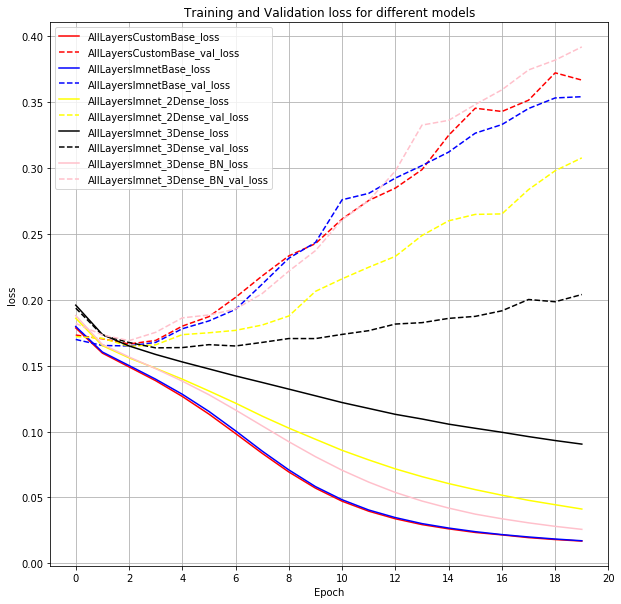

In [181]:
classiutils.plot_metrics_for_models([history_alllayers_1, history_alllayers_imnet, history_alllayers_imnet_d2, history_alllayers_imnet_d3, history_alllayers_imnet_d3_bn], 
                                    ['AllLayersCustomBase', 'AllLayersImnetBase','AllLayersImnet_2Dense','AllLayersImnet_3Dense','AllLayersImnet_3Dense_BN'],
                                    metric_name='loss', color_list=color_list)

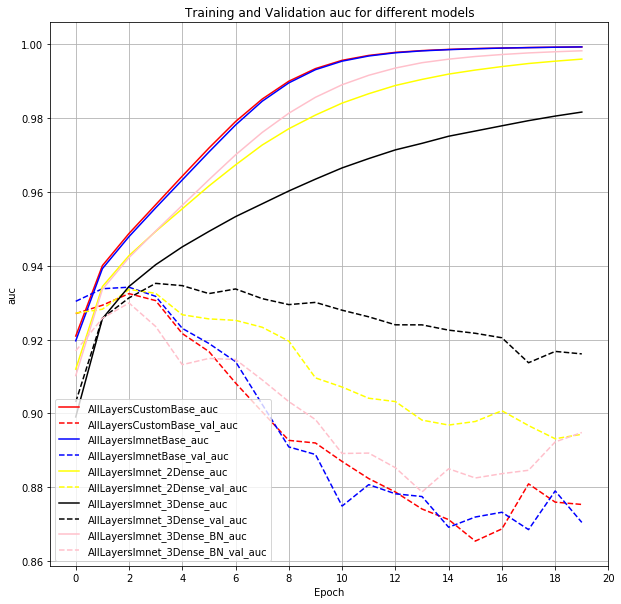

In [182]:
classiutils.plot_metrics_for_models([history_alllayers_1, history_alllayers_imnet, history_alllayers_imnet_d2, history_alllayers_imnet_d3, history_alllayers_imnet_d3_bn], 
                                    ['AllLayersCustomBase', 'AllLayersImnetBase','AllLayersImnet_2Dense','AllLayersImnet_3Dense','AllLayersImnet_3Dense_BN'],
                                    metric_name='auc', color_list=color_list)

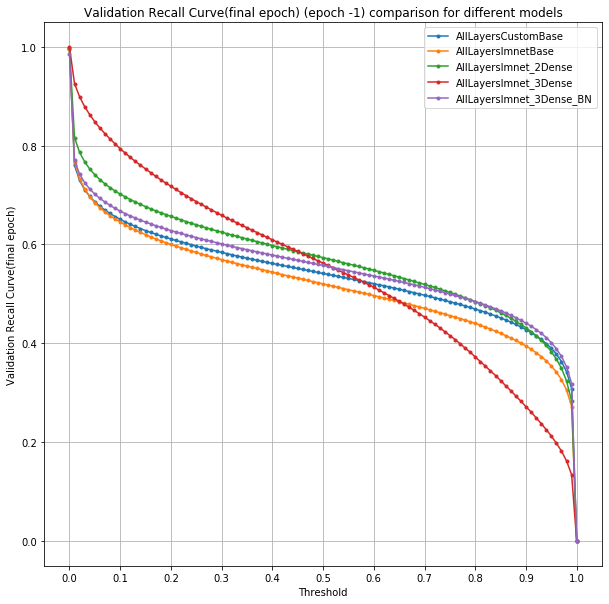

In [174]:
metric_name = "val_recall"
val_recall_dict = {"AllLayersCustomBase": history_alllayers_1[metric_name], 
                   #"Model All Layers Train 2": history_alllayers_2[metric_name], 
                   #"Model All Layers Train CW Balanced": history_alllayers_cw_1[metric_name][-1], 
                   #"Model All Layers Train CW 0.5": history_alllayers_cw_2[metric_name][-1], 
                   #"Model All Layers Train CW Imnet": history_alllayers_cw_imnet[metric_name][-1],
                   "AllLayersImnetBase": history_alllayers_imnet[metric_name],
                   "AllLayersImnet_2Dense": history_alllayers_imnet_d2[metric_name],
                  "AllLayersImnet_3Dense": history_alllayers_imnet_d3[metric_name],
                  #"Model All Layers Train Imnet D3.1": history_alllayers_imnet_d3_1[metric_name],
                  "AllLayersImnet_3Dense_BN": history_alllayers_imnet_d3_bn[metric_name]}

classiutils.compare_precision_recall_curves(val_recall_dict, "Validation Recall Curve(final epoch)")
#classiutils.compare_precision_recall_curves()

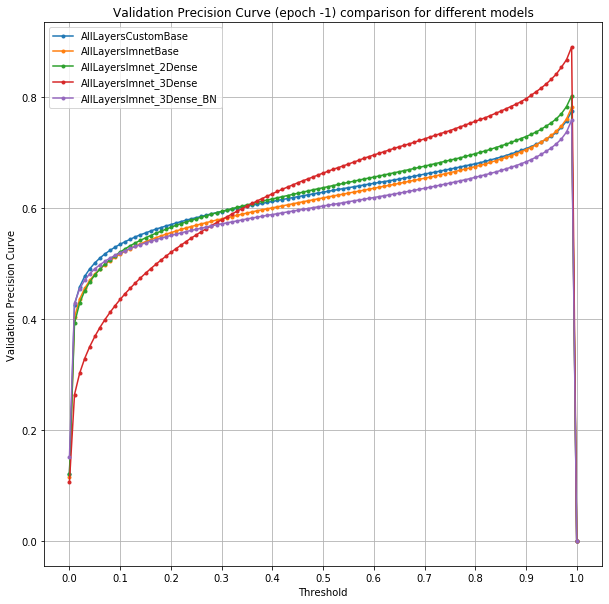

In [175]:
metric_name = "val_precision"
val_precision_dict = {"AllLayersCustomBase": history_alllayers_1[metric_name], 
                   #"Model All Layers Train 2": history_alllayers_2[metric_name], 
                   #"Model All Layers Train CW Balanced": history_alllayers_cw_1[metric_name][-1], 
                   #"Model All Layers Train CW 0.5": history_alllayers_cw_2[metric_name][-1], 
                   #"Model All Layers Train CW Imnet": history_alllayers_cw_imnet[metric_name][-1],
                   "AllLayersImnetBase": history_alllayers_imnet[metric_name],
                   "AllLayersImnet_2Dense": history_alllayers_imnet_d2[metric_name],
                  "AllLayersImnet_3Dense": history_alllayers_imnet_d3[metric_name],
                  #"Model All Layers Train Imnet D3.1": history_alllayers_imnet_d3_1[metric_name],
                  "AllLayersImnet_3Dense_BN": history_alllayers_imnet_d3_bn[metric_name]}

classiutils.compare_precision_recall_curves(val_precision_dict, "Validation Precision Curve")

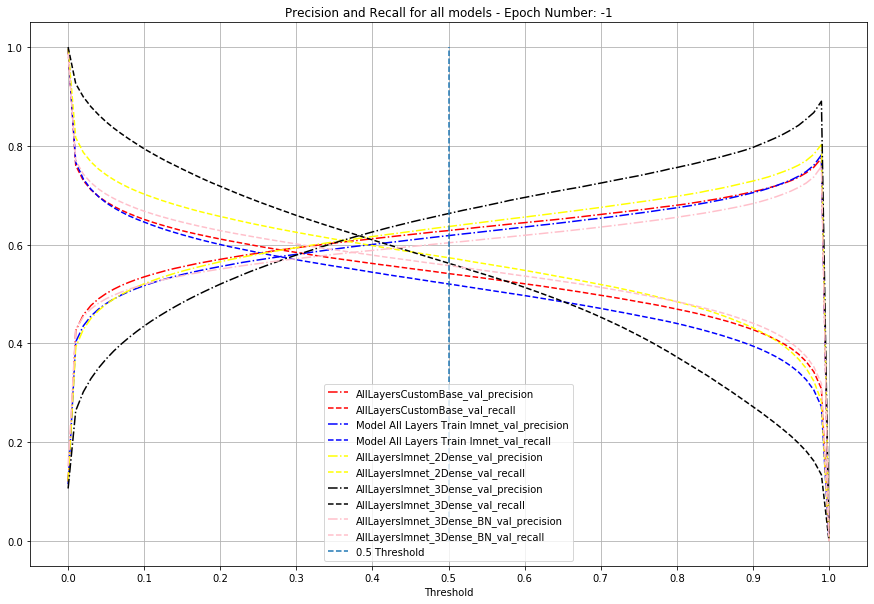

In [198]:
history_dict = {"AllLayersCustomBase": history_alllayers_1, 
                   #"Model All Layers Train 2": history_alllayers_2, 
                   #"Model All Layers Train CW Balanced": history_alllayers_cw_1, 
                   #"Model All Layers Train CW 0.5": history_alllayers_cw_2, 
                   "Model All Layers Train Imnet": history_alllayers_imnet,
                   "AllLayersImnet_2Dense": history_alllayers_imnet_d2,
                   "AllLayersImnet_3Dense": history_alllayers_imnet_d3,
                   "AllLayersImnet_3Dense_BN": history_alllayers_imnet_d3_bn}
classiutils.plot_precision_recall_intersection(history_dict, color_list=['red','blue','yellow','black','pink'])

In [41]:
def plot_metrics_curve_all_epochs(history, metric, epochs=[]):
    """
    Plots the precison or recall curve for all epochs over a range of threshold
    :param: history - history object
    :param: metric - metric name like val_precision or val_recall
    :param: epochs - optional list of epochs
    """
    x_ticks_labels = [float(i/100) for i in range(0,101,10)]
    x_ticks = [i for i in range(0,101,10)]
    plt.figure(figsize=(10,10))
    if not epochs:
        for i, recall in enumerate(history[metric]):
            plt.plot(recall, marker='.', label=f"epoch "+str(i+1))
    else:
        for i in epochs:
            plt.plot(history[metric][i-1], marker='.', label=f"epoch "+str(i))

    plt.legend()
    plt.xticks(x_ticks, x_ticks_labels)
    plt.xlabel("Threshold")
    plt.grid()
    plt.ylabel(metric)
    plt.title(f"{metric} curve for all epochs")
    plt.show()

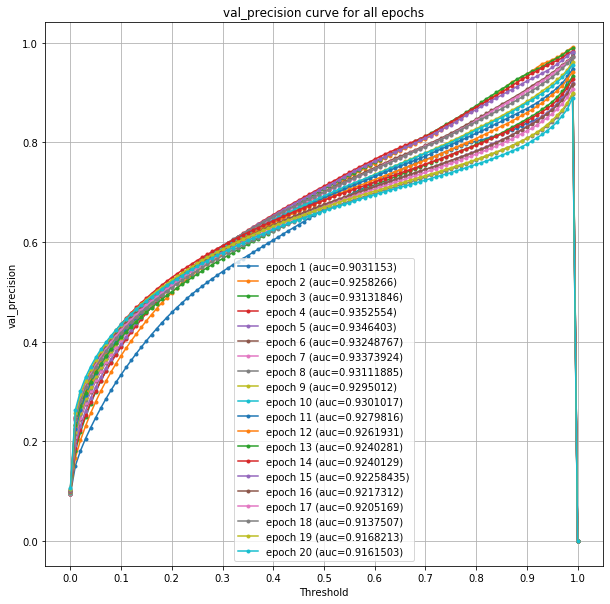

In [79]:
classiutils.plot_metrics_curve_all_epochs(history_alllayers_imnet_d3, 'val_precision')

In [131]:
def plot_roc_curve_for_model(history, epochs=[], data="validation"):
    """
    Plots the ROC curve of model training by calculating the TPRs and FPRs by data inside the history of the
    trained model
    :param: history - A history object stored during model training
    :param: epochs - An optional list of epochs
    :param: data - either "training" or validation
    """
    
    prefix = ""
    if data == "validation":
        prefix = "val_"
    tprs = []
    fprs = []
    if len(epochs) == 0:
        epochs = [i for i in range(len(history_alllayers_imnet_d3['loss']))]
    else:
        # user enters epoch numbers starting from 1 as shown in the training screen, however the
        # epoch array starts from index 0
        epochs = [i-1 for i in epochs]
    for epoch in epochs:
        tp = history[prefix+'tp'][epoch]
        fp = history[prefix+'fp'][epoch]
        fn = history[prefix+'fn'][epoch]
        tn = history[prefix+'tn'][epoch]
        tpr = np.nan_to_num((tp)/(tp+fn))
        fpr = np.nan_to_num((fp)/(fp+tn))
        sorted_args = np.argsort(fpr)
        fprs.append(fpr[sorted_args])
        tprs.append(tpr[sorted_args])
    plt.figure(figsize=(12,12))
    for epoch in range(len(tprs)):
        auc = history[prefix+'auc'][epochs[epoch]]
        plt.plot(fprs[epoch],tprs[epoch], marker='.', label=f"Epoch {epochs[epoch]+1} (AUC={auc})")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.title('ROC for training Data')
    plt.show()

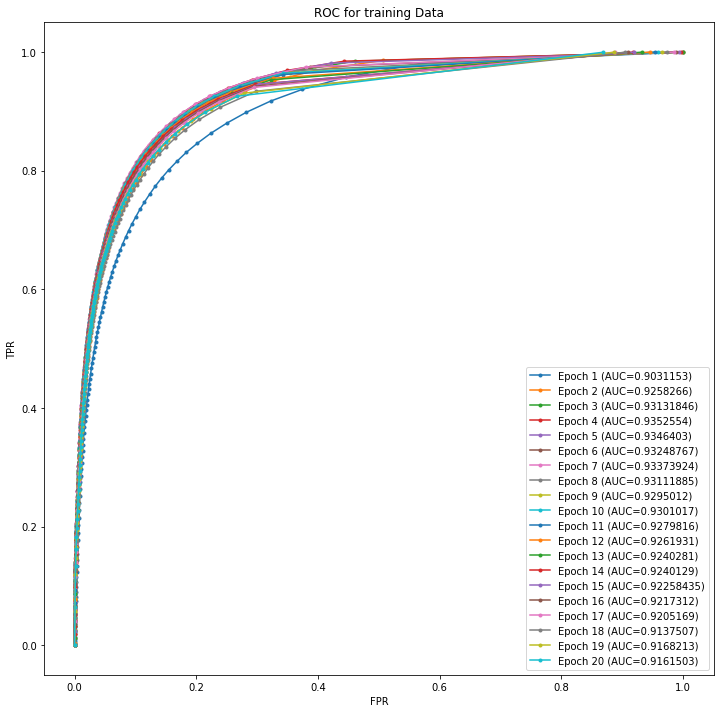

In [161]:
plot_roc_curve_for_model(history_alllayers_imnet_d3, data="validation")

In [106]:
tpr = np.nan_to_num((tp)/(tp+fn))
fpr = np.nan_to_num((fp)/(fp+tn))

In [107]:
sorted_args = np.argsort(fpr)

In [104]:
sorted_args

array([100,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99])

In [102]:
from sklearn.metrics import roc_curve,auc, roc_auc_score

In [ ]:
roc_auc_score()